## SeisNoise Implementation for OOI Cabled Array Data

### Standard SeisNoise code adapted to save cross correlation files of multiple years between two specific stations


In [ ]:
using SeisNoise, SeisIO, Plots, HDF5
fs = 40. # sampling frequency in Hz
freqmin,freqmax = 0.1,0.2 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

for j in 2015:2020
    if j==2020
        m=1
        k=365
    elseif j==2015
        m=63
        k=360
    elseif j==2016
        m=1
        k=366
    else
        m=1
        k=365
    end
        
        
    for i in m:k 

        if i<10
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
        end

        y=0
        try S1=read_data(a) catch; y=1 end
        try S2=read_data(b) catch; y=1 end
        try process_raw!(S1,fs) catch; y=1 end
        try process_raw!(S2,fs) catch; y=1 end
        
        if y==0
            S1=read_data(a)
            S2=read_data(b)
            process_raw!(S1,fs)
            process_raw!(S2,fs)
            
            if length(S1.x[])==3456000 && length(S2.x[])==3456000
                R = RawData.([S1,S2],cc_len,cc_step)
                detrend!.(R)
                taper!.(R)
                bandpass!.(R,freqmin,freqmax,zerophase=true)
                FFT = rfft.(R)
                whiten!.(FFT,freqmin,freqmax)
                C = correlate(FFT[1],FFT[2],maxlag)
                save_corr(C,"/data/wsd01/corrdata/")
            end
            
        end
    
    end
end


### standard seisnoise code for plotting cross correlation function for one day between two stations

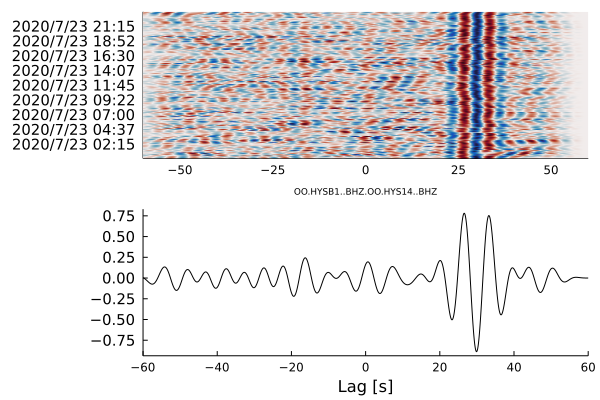

In [57]:
using SeisNoise, SeisIO, Plots
fs = 40. # sampling frequency in Hz
freqmin,freqmax = 0.1,0.2 # min and max frequencies
cc_step, cc_len = 450, 1800 # corrleation step and length in S
maxlag = 60. # maximum lag time in correlation

j=2020
i=205
        if i<10
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/00",string(i),"/HYSB1.OO.",string(j),".00",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/00",string(i),"/HYS14.OO.",string(j),".00",string(i),".SHZ")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/0",string(i),"/HYSB1.OO.",string(j),".0",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/0",string(i),"/HYS14.OO.",string(j),".0",string(i),".SHZ")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYSB1/",string(j),"/",string(i),"/HYSB1.OO.",string(j),".",string(i),".SHZ")
            b=string("/data/wsd01/OOI-Data/HYS14/",string(j),"/",string(i),"/HYS14.OO.",string(j),".",string(i),".SHZ")
        end

        S1=read_data(a)
        S2=read_data(b)

        process_raw!(S1,fs)
        process_raw!(S2,fs)

        R = RawData.([S1,S2],cc_len,cc_step)
        detrend!.(R)
        taper!.(R)
        bandpass!.(R,freqmin,freqmax,zerophase=true)
        FFT = rfft.(R)
        whiten!.(FFT,freqmin,freqmax)
        C = correlate(FFT[1],FFT[2],maxlag)
        clean_up!(C,freqmin,freqmax)
        abs_max!(C)
        plot(C)


### Save correlation matrix for one day -> debugging portal

In [ ]:
j=2017
i=287        
        if i<10
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/00",string(i),"/HYS12.OO.",string(j),".00",string(i),".SHN")
        elseif i>=10 && i<100
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/0",string(i),"/HYS12.OO.",string(j),".0",string(i),".SHN")
        elseif i>=100 && i<1000
            a=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHE")
            b=string("/data/wsd01/OOI-Data/HYS12/",string(j),"/",string(i),"/HYS12.OO.",string(j),".",string(i),".SHN")
        end

        y=0
        try S1=read_data(a) catch; y=1 end
        try S2=read_data(b) catch; y=1 end
        try process_raw!(S1,fs) catch; y=1 end
        try process_raw!(S2,fs) catch; y=1 end
        
        if y==0
            S1=read_data(a)
            S2=read_data(b)
            process_raw!(S1,fs)
            process_raw!(S2,fs)

            R = RawData.([S1,S2],cc_len,cc_step)
            detrend!.(R)
            taper!.(R)
            bandpass!.(R,freqmin,freqmax,zerophase=true)
            FFT = rfft.(R)
            whiten!.(FFT,freqmin,freqmax)
            C = correlate(FFT[1],FFT[2],maxlag)
            save_corr(C,"/data/wsd01/corrdata/")
        end

### checks the available date entries withing the JLD file

In [22]:
using JLD2
jldopen("/data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2")

# /data/wsd01/corrdata/OO.HYS11..SHE.OO.HYS11..SHN.jld2
# /data/wsd01/corrdata/OO.HYS12..SHE.OO.HYS12..SHN.jld2
# /data/wsd01/corrdata/OO.HYS13..SHE.OO.HYS13..SHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2
# /data/wsd01/corrdata/OO.HYSB1..BHE.OO.HYSB1..BHN.jld2
# /data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2

JLDFile /data/wsd01/corrdata/OO.HYS14..BHZ.OO.HYSB1..BHZ.jld2 (read-only)
 └─📂 ZZ
    ├─🔢 2015-03-09
    ├─🔢 2015-03-11
    ├─🔢 2015-03-12
    ├─🔢 2015-03-14
    ├─🔢 2015-03-15
    ├─🔢 2015-03-17
    ├─🔢 2015-03-18
    ├─🔢 2015-03-20
    └─ ⋯ (1244 more entries)

### Loads correlation for one day --> EN: between East and North , ZZ: between Z and Z channel

In [13]:
d=load_corr("/data/wsd01/corrdata/OO.HYS14..BHE.OO.HYS14..BHN.jld2","EN",day="2016-01-05")

CorrData with 189 Corrs
      NAME: "OO.HYS14..BHE.OO.HYS14..BHN"      
        ID: "2016-01-05"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
      COMP: "EN"                               
   ROTATED: false                              
 CORR_TYPE: "CC"                               
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.1
   FREQMAX: 0.2
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: true                               
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 0z, 0p
      MISC: 0 entries                          
     NOTES: 7 entries                          
      DIST: 0.0
       AZI: 0.0
       BAZ: 0.0
    MAXLAG: 60.0
         T: 2016-01-05T00:00:00                …
      CORR: 4801×189 Matrix{Float32}           


### loads Saved Correlation functions and Stack them daily ---> Plot and Save figure of stacked version

In [54]:
d=load_corr("/data/wsd01/corrdata/OO.HYSB1..BHE.OO.HYSB1..BHN.jld2","EN")
z6=stack(d)

CorrData with 1355 Corrs
      NAME: "OO.HYSB1..BHE.OO.HYSB1..BHN"      
        ID: "2015-03-09"                       
       LOC: 0.0 N, 0.0 E, 0.0 m
      COMP: "EN"                               
   ROTATED: false                              
 CORR_TYPE: "CC"                               
        FS: 40.0
      GAIN: 1.0
   FREQMIN: 0.1
   FREQMAX: 0.2
    CC_LEN: 1800.0
   CC_STEP: 450.0
  WHITENED: true                               
 TIME_NORM: ""                                 
      RESP: a0 1.0, f0 1.0, 0z, 0p
      MISC: 0 entries                          
     NOTES: 7 entries                          
      DIST: 0.0
       AZI: 0.0
       BAZ: 0.0
    MAXLAG: 60.0
         T: 2015-03-09T00:00:00                …
      CORR: 4801×1355 Matrix{Float32}          


In [55]:
clean_up!(z6,freqmin,freqmax)
abs_max!(z6)
plot(z6)
plot!(size=(1200,1200))
savefig("HYSB1HYSB1.pdf")

In [56]:
pwd()
ls()

35-element Vector{String}:
 "/home/seismic/.bash_history"
 "/home/seismic/.bash_logout"
 "/home/seismic/.bash_profile"
 "/home/seismic/.bashrc"
 "/home/seismic/.cache"
 "/home/seismic/.conda"
 "/home/seismic/.config"
 "/home/seismic/.esd_auth"
 "/home/seismic/.ipynb_checkpoints"
 "/home/seismic/.ipython"
 "/home/seismic/.julia"
 "/home/seismic/.jupyter"
 "/home/seismic/.local"
 ⋮
 "/home/seismic/HYS13HYS13.pdf"
 "/home/seismic/HYS14HYS14.pdf"
 "/home/seismic/HYS14HYSB1.pdf"
 "/home/seismic/HYSB1HYSB1.pdf"
 "/home/seismic/OO.HYS12..SHE.OO.HYS12..SHN.jld2"
 "/home/seismic/Seisnoise.ipynb"
 "/home/seismic/anaconda3"
 "/home/seismic/bin"
 "/home/seismic/notebooks"
 "/home/seismic/pnwstore"
 "/home/seismic/streaming_data.ipynb"
 "/home/seismic/sw"

### terminal commands

htop
df
ls
cd
